# Matplotlib

In [122]:
import matplotlib.pyplot as plt
import geopandas as gpd
zeme = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

mesta = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

display("Tabulka světových zemí:", world, "Tabulka hlavních měst:", cities)

'Tabulka světových zemí:'

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

'Tabulka hlavních měst:'

name                     geometry
0    Vatican City    POINT (12.45339 41.90328)
1      San Marino    POINT (12.44177 43.93610)
2           Vaduz     POINT (9.51667 47.13372)
3      Luxembourg     POINT (6.13000 49.61166)
4         Palikir    POINT (158.14997 6.91664)
..            ...                          ...
197         Cairo    POINT (31.24802 30.05191)
198         Tokyo   POINT (139.74946 35.68696)
199         Paris     POINT (2.33139 48.86864)
200      Santiago  POINT (-70.66899 -33.44807)
201     Singapore    POINT (103.85387 1.29498)

[202 rows x 2 columns]

153    32872.047359
Name: gdp_per_cap, dtype: float64

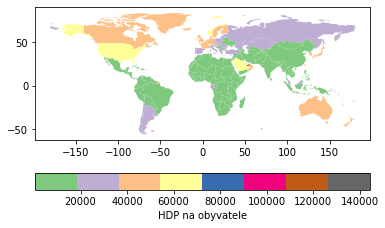

In [124]:
# Choropletová mapa v Matplotlib

%matplotlib inline
# použijte %matplotlib auto, aby se mapa zobrazila v samostatném okně


# Vybere z první tabulky všechny řádky, kde není počet obyvatel 0 a které nejsou Antarktida
zeme = zeme[(zeme.pop_est>0) & (zeme.name!="Antarctica")]

# Přidá do tabulky nový sloupec, do kterého uloží výsledek podílu celkového HDP a počtu obyvatel dané země
zeme['gdp_per_cap'] = zeme.gdp_md_est * (10**6)/ zeme.pop_est

# Vytvoří mapu
ax = zeme.plot(column='gdp_per_cap', legend=True,
           legend_kwds={'label': "HDP na obyvatele",
                       'orientation': "horizontal"},   
           cmap="Accent"
        )

# Vypsání hodnoty HDP na obyvatele pro Česko - není přesné, ale řádově odpovídá
zeme[zeme["name"] == "Czechia"]["gdp_per_cap"]

<AxesSubplot:>

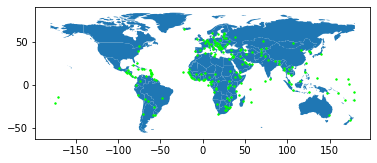

In [126]:
# Ukázka použití více vrstev na jedné mapě

%matplotlib inline
spodni_vrstva = zeme.plot()

mesta.plot(ax=spodni_vrstva, color="lime", markersize=2)

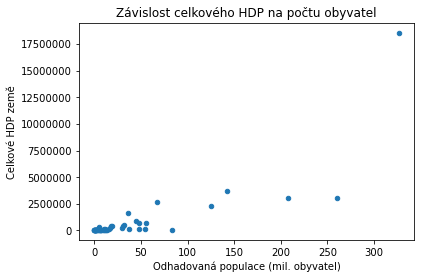

In [128]:
# Jiné grafy v Matplotlib

%matplotlib inline
gdf = zeme.head(50)[["pop_est", "gdp_md_est"]]  # Vybere pouze prvních 50 řádků z tabulky 

gdf.pop_est = gdf.pop_est / 10 ** 6  # Převede počet obyvatel na miliony

graf = gdf.plot(
    kind='scatter', x="pop_est", y="gdp_md_est"
)
graf.set_title("Závislost celkového HDP na počtu obyvatel")
graf.set_xlabel("Odhadovaná populace (mil. obyvatel)")
graf.set_ylabel("Celkové HDP země")

graf.ticklabel_format(style='plain')  # Bez tohoto by byly hodnoty na osách x a y ve vědecké notaci

### Převody do knihovny Cartopy (z dokumentace GeoPandas)

Cartopy umožňuje vytvářet mapy v jiných CRS než GeoPandas. K zobrazení těchto map se také může používat Matplotlib

In [129]:
from cartopy import crs as ccrs

In [132]:
car_crs = ccrs.AzimuthalEquidistant() # Vytvoření CRS
zeme_azimut = zeme.to_crs(car_crs.proj4_init)  # Převedení tabulky do nového CRS

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

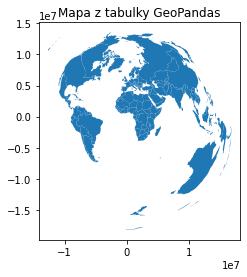

In [133]:
# Vytvoření mapy z tabulky GeoPandas, která má nastavený CRS pomocí Cartopy
zeme_azimut.plot().set_title("Mapa z tabulky GeoPandas")

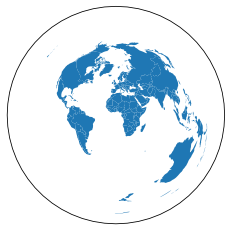

In [135]:
# Druhý způsob vytvoření mapy z CRS vytvořeného pomocí Cartopy

fig, ax = plt.subplots(subplot_kw={"projection": car_crs})
ax.add_geometries(zeme_azimut["geometry"], crs=car_crs)

# Folium

In [137]:
import folium
import json
import requests

In [158]:
# Ukázka mapy ve folium

mapa = folium.Map(location = [50.0751,15.9844], tiles='OpenStreetMap' , zoom_start = 15)
mapa

In [159]:
# Značky a ikony

# Načtení vlastní ikony z obrázku (modrá šipka)
vlastni_ikona = folium.features.CustomIcon("Data/icon.png", icon_size=(20, 40), icon_anchor=(10, 40), popup_anchor=(0, -20))
# Přidání zančky na mapu
mapa.add_child(
    folium.map.Marker(location = [50.0751,15.9844], popup="Gymnázium", icon=icon)
)


# Přidání značky s ikonou z Font Awesome
# Všechny dostupné ikony jsou na stránce https://fontawesome.com/v4.7.0/icons/
# Pro použití Font Awesome je nutné za argument prefix dosadit "fa"
mapa.add_child(
    folium.map.Marker(
        location = [50.0690647, 15.9863142], popup="Autobusové nádraží", icon=folium.map.Icon(icon="bus", prefix="fa")
    )
)

## Značka s grafem Vega
# Tuto značku lze přemisťovat
data_url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/vis2.json"
vega_data = json.loads(requests.get(data_url).text)  # Načtení dat ve formátu json

graf = folium.Vega(vega_data, width=450, height=250)  # Vytvoření grafu
mapa.add_child(
    folium.Marker(
        location=[50.0690056, 15.9881889],
        popup=folium.Popup(max_width=450).add_child(graf),
        draggable=True,
        icon=folium.map.Icon(icon="cloud")
    )
)


# Umožňění uživateli přidávat ikony
mapa.add_child(folium.features.ClickForMarker(popup="Vaše značka"))
    
mapa

In [160]:
# Ukázka kartogramu / choropletové mapy

zeme.to_crs("merc", inplace = True) # Převedení tabulky do jiného CRS

# Vytvoření podkladové mapy
podklad_mapa = folium.Map(location = [50.0751,15.9844], tiles='OpenStreetMap', zoom_start = 2)

# Vytvoření samotné choropletové mapy, která se vykreslí nad podkadovou vrstvou
# Argument key_on určuje, jak se mají tabulka s geometrií a tabulka s daty sloučit (tabulka s geometrií se převede do JSON, proto se použilo feature.properties.name a ne jenom name)
choroplet = folium.features.Choropleth(
    geo_data=zeme, data=zeme, columns=["name", "gdp_per_cap"], key_on="feature.properties.name", 
    legend_name="HDP na obyvatele", fill_opacity=0.75
)

podklad_mapa.add_child(choroplet)
podklad_mapa